# Statistics from Madplanner ⚡️📊

<img width=300 src="https://i.pinimg.com/474x/6a/18/df/6a18dff64059bb388ed1046c0f2cc350.jpg">

### Importing libraries and data 📚

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import src.statistics as s

In [2]:
df_cat = pd.read_csv("preferences/cat.csv")
df_loc =  pd.read_csv("preferences/loc.csv")
df_price =  pd.read_csv("preferences/price.csv")
df_rat =  pd.read_csv("preferences/rat.csv")
df_type =  pd.read_csv("preferences/type.csv")

## First..  Cleaning data 🧽🛀🏻

In [3]:
df = pd.concat([df_rat,df_type,df_price,df_loc,df_cat])
df = df.reset_index(drop=True)

In [4]:
df["day"] = df.apply(lambda row: f"{row['time'][:11]}", axis = 1)
df["hour"] = df.apply(lambda row: f"{row['time'][11:16]}", axis = 1)
df["month"] = df.apply(lambda row: f"{row['time'][5:7]}", axis = 1)
df["moment"] = df.hour.apply(s.daynnite)

In [5]:
df.age = df.age.astype(int)

In [6]:
df.drop(["time"],axis=1, inplace=True)

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.head()

,name,age,category,filter,weekday,gender,ocupation,children,residence,subcategory,day,hour,month,moment
0,Clara,12,4.2,rating,1,Female,Studying,NO,Outside of Spain,NaN,2021-05-18,11:45,05,morning
1,Maricarmen,24,4.7,rating,1,Female,Studying,NO,Madrid,NaN,2021-05-18,12:50,05,morning
2,Maricarmen,24,4.0,rating,1,Female,Studying,NO,Madrid,NaN,2021-05-18,12:50,05,morning
3,Julia,74,4.6,rating,1,Female,Working,YES,Outside of Spain,NaN,2021-05-18,12:50,05,morning
4,Julia,74,4.7,rating,1,Female,Working,YES,Outside of Spain,NaN,2021-05-18,12:50,05,morning


## Now, let's start analysing! 🐼😉

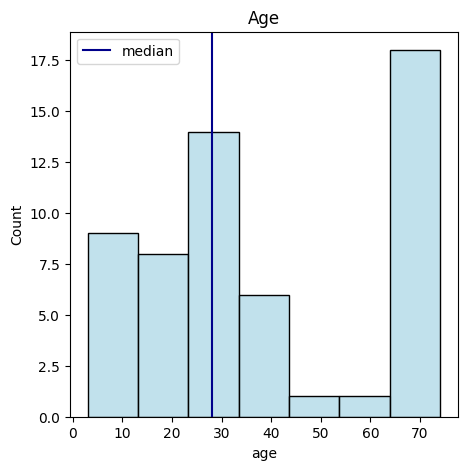

In [9]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.histplot(x = "age", data = df, color = "lightblue")
ax.set_title("Age")
ax.axvline(x=df.age.median(), color="darkblue", label="median")
ax.legend()
plt.show()

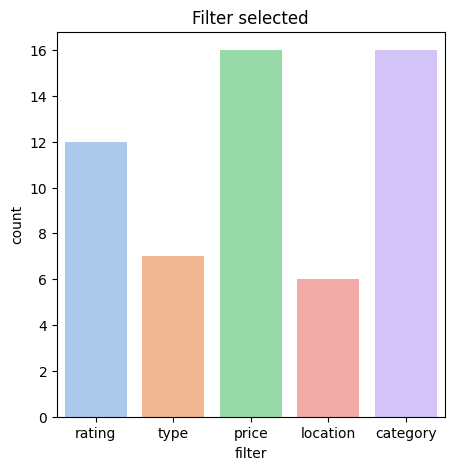

In [10]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.countplot(x = "filter", data = df, palette = "pastel")
ax.set_title("Filter selected")
plt.show()

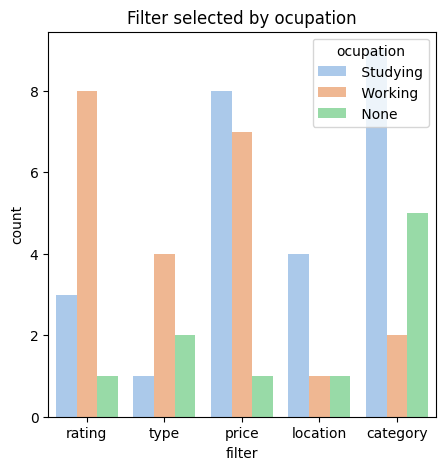

In [11]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.countplot(x = "filter", data = df, palette = "pastel", hue="ocupation")
ax.set_title("Filter selected by ocupation")
plt.show()

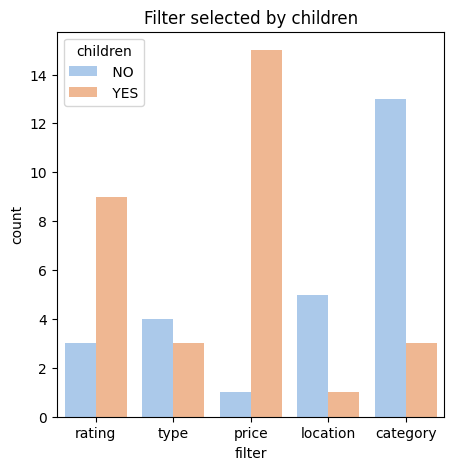

In [12]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.countplot(x = "filter", data = df, palette = "pastel", hue="children")
ax.set_title("Filter selected by children")
plt.show()

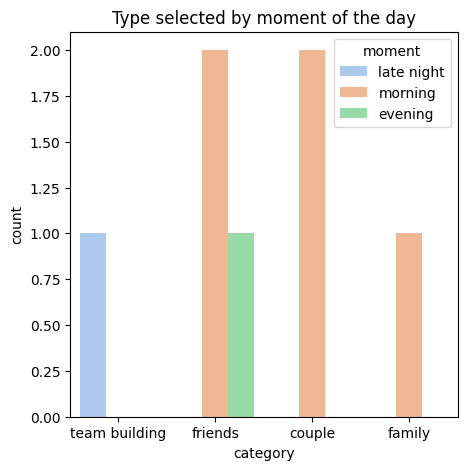

In [13]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.countplot(x = "category", data = df[df["filter"]=="type"], palette = "pastel", hue="moment")
ax.set_title("Type selected by moment of the day")
plt.show()

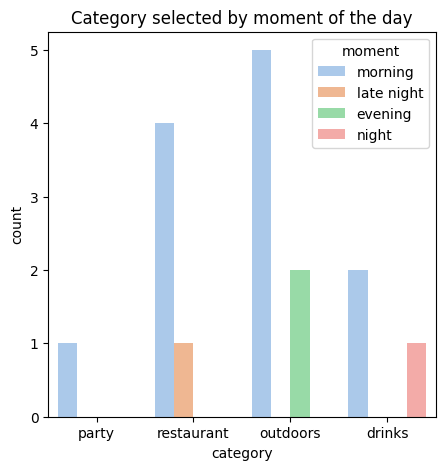

In [14]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.countplot(x = "category", data = df[df["filter"]=="category"], palette = "pastel", hue="moment")
ax.set_title("Category selected by moment of the day")
plt.show()

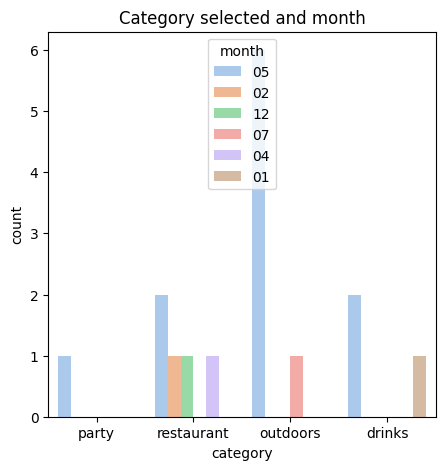

In [15]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.countplot(x = "category", data = df[df["filter"]=="category"], palette = "pastel", hue="month")
ax.set_title("Category selected and month")
plt.show()

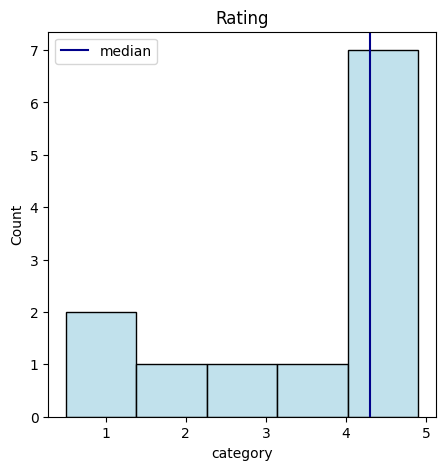

In [16]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.histplot(x = "category", data = df[df["filter"]=="rating"], color = "lightblue")
ax.set_title("Rating")
ax.axvline(x=df[df["filter"]=="rating"].category.median(), color="darkblue", label="median")
ax.legend()
plt.show()

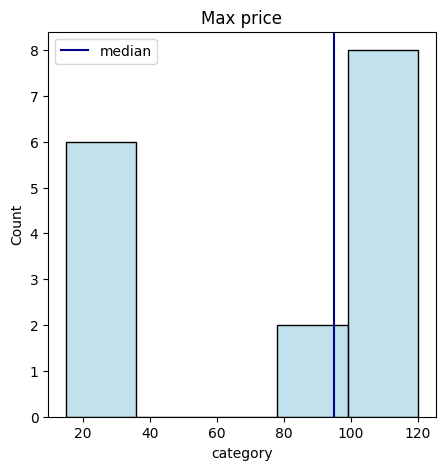

In [17]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.histplot(x = "category", data = df[df["filter"]=="price"], color = "lightblue")
ax.set_title("Max price")
ax.axvline(x=df[df["filter"]=="price"].category.median(), color="darkblue", label="median")
ax.legend()
plt.show()

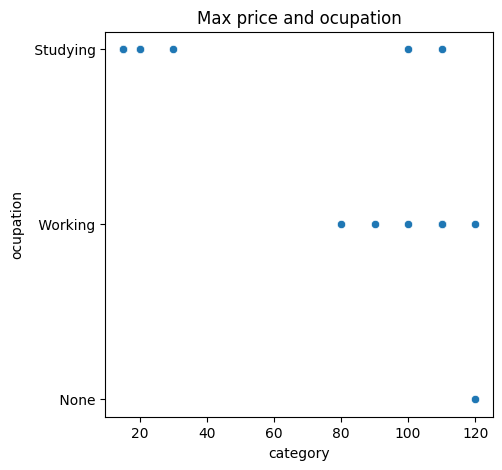

In [18]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.scatterplot(x = "category", y= "ocupation",data = df[df["filter"]=="price"], palette = "pastel")
ax.set_title("Max price and ocupation")
plt.show()

## Some machine learning

In [19]:
df.sample(10)

,name,age,category,filter,weekday,gender,ocupation,children,residence,subcategory,day,hour,month,moment
25,Julia,74,20,price,1,Female,Studying,YES,Outside of Spain,NaN,2021-05-18,12:56,05,morning
24,Julia,74,30,price,1,Female,Studying,YES,Outside of Spain,NaN,2021-05-18,12:56,05,morning
18,Samantha,28,friends,type,1,Female,None,YES,Madrid,NaN,2021-05-18,13:09,05,morning
46,Diana,20,restaurant,category,2,Female,Studying,NO,Outside of Spain,seafood,2021-02-24,11:22,02,morning
59,Maricarmen,24,drinks,category,1,Female,Studying,NO,Madrid,cocktail,2021-05-18,11:50,05,morning
56,Galita,3,restaurant,category,6,Female,None,NO,Madrid,pet friendly,2021-04-18,11:37,04,morning
42,Santi,25,Madrid,location,1,Male,Working,NO,Another city in Spain,Villa de Vallecas,2021-05-18,11:20,05,morning
26,Julia,74,15,price,1,Female,Studying,YES,Outside of Spain,NaN,2021-05-18,12:56,05,morning
2,Maricarmen,24,4.0,rating,1,Female,Studying,NO,Madrid,NaN,2021-05-18,12:50,05,morning
31,Clara,34,110,price,1,Female,Working,YES,Outside of Spain,NaN,2021-05-18,12:59,05,morning
